In [ ]:
# Lab NO: 1
# Title: Logistic Regression 
# Objective: To understand and apply the complete Machine Learning (ML) pipeline using Logistic Regression 
#            for a binary classification problem.
#Submitted By : Himal Joshi (ACE079BCT028) A2

# Task 1: Logistic Regression with a Single Feature (Cholesterol)

Goal: Build a logistic regression model using **Cholesterol** as the only input feature to
predict **HeartDisease**.  
This task demonstrates the complete machine learning pipeline using a simple and
highly interpretable model.


In [5]:
#Dependencies
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Kaggle dataset loader
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Machine Learning (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


## 1️⃣ Data Retrieval and Collection

The Heart Disease dataset is collected from Kaggle using the `kagglehub` library.
This dataset contains medical attributes related to cardiovascular health.
The target variable **HeartDisease** indicates whether a patient has heart disease:
- `1` → Presence of heart disease
- `0` → No heart disease

In [7]:
import kagglehub

# Download dataset and get local directory path
dataset_dir = kagglehub.dataset_download("neurocipher/heartdisease")

print("Dataset downloaded to:")
print(dataset_dir)


100%|██████████| 3.41k/3.41k [00:00<00:00, 1.11MB/s]

Extracting files...
Dataset downloaded to:
C:\Users\himal\.cache\kagglehub\datasets\neurocipher\heartdisease\versions\1


In [8]:
import os

print("Files available in the dataset:")
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        print(file)


Files available in the dataset:
Heart_Disease_Prediction.csv


In [9]:
from kagglehub import KaggleDatasetAdapter

file_path = "Heart_Disease_Prediction.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "neurocipher/heartdisease",
    file_path
)

print("✅ Dataset loaded successfully")


C:\Users\himal\AppData\Local\Temp\ipykernel_23208\3409524407.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Download already complete (11928 bytes).
✅ Dataset loaded successfully


In [10]:
print("Dataset Shape (rows, columns):", df.shape)

print("\nColumn Names:")
print(df.columns.tolist())


Dataset Shape (rows, columns): (270, 14)

Column Names:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']


In [11]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### Dataset Description
- Each row represents a patient’s medical record.
- Columns include clinical attributes such as cholesterol levels and other health indicators.
- The dataset is designed for binary classification, where **HeartDisease** is the target variable.


## 2️⃣ Data Cleaning

Data cleaning is performed to ensure the dataset is accurate and suitable for machine learning.
This step includes:
- Checking for missing values
- Handling invalid cholesterol values
- Ensuring the target variable is binary
- Verifying correct data types


In [12]:
#Check Missing Values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [13]:
#Verify Data Types
print("Data types of columns:")
df.dtypes


Data types of columns:


Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [18]:
#Handle Invalid Cholesterol Values
#In this dataset, cholesterol value = 0 is medically invalid and treated as missing.

# Ensure Cholesterol is numeric
df["Cholesterol"] = pd.to_numeric(df["Cholesterol"], errors="coerce")

# Treat invalid cholesterol values (<= 0) as missing
df.loc[df["Cholesterol"] <= 0, "Cholesterol"] = np.nan

# Fill missing cholesterol with median
df["Cholesterol"].fillna(df["Cholesterol"].median(), inplace=True)

print("✅ Cholesterol cleaned.")
print("Missing Cholesterol after cleaning:", df["Cholesterol"].isna().sum())


✅ Cholesterol cleaned.
Missing Cholesterol after cleaning: 0


C:\Users\himal\AppData\Local\Temp\ipykernel_23208\998794957.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cholesterol"].fillna(df["Cholesterol"].median(), inplace=True)


In [ ]:
#Fix Target Column (Presence/Absence → 1/0)

print("Unique values in 'Heart Disease' before mapping:")
print(df["Heart Disease"].unique())

# Map string labels to binary
target_map = {"Presence": 1, "Absence": 0}
df["Heart Disease"] = df["Heart Disease"].map(target_map)

# If anything didn't map, it becomes NaN -> detect it
unmapped = df["Heart Disease"].isna().sum()
print("Unmapped target values (should be 0):", unmapped)

# Drop rows where target is still missing (safety)
df = df.dropna(subset=["Heart Disease"])

# Convert to integer
df["Heart Disease"] = df["Heart Disease"].astype(int)

print("\n✅ Target cleaned and converted to binary int.")
print("Unique values after mapping:", df["Heart Disease"].unique())

Unique values in 'Heart Disease' before mapping:
['Presence' 'Absence']
Unmapped target values (should be 0): 0

✅ Target cleaned and converted to binary int.
Unique values after mapping: [1 0]


In [20]:
#Rename Target Column

df.rename(columns={"Heart Disease": "HeartDisease"}, inplace=True)

print("✅ Renamed target column to 'HeartDisease'")
print("Updated columns:")
print(df.columns.tolist())


✅ Renamed target column to 'HeartDisease'
Updated columns:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'HeartDisease']


In [21]:
df[["Cholesterol", "HeartDisease"]].head()


,Cholesterol,HeartDisease
0,322.0,1
1,564.0,0
2,261.0,1
3,263.0,0
4,269.0,0


The target labels were categorical (“Presence”, “Absence”), so they were encoded into binary values (1, 0) to support logistic regression.

## 3️⃣ Feature Design

Feature design involves selecting relevant input variables (features) and separating
them from the target variable.

For Task 1, only **one feature** is used:
- **Input Feature (X):** Cholesterol
- **Target Variable (y):** HeartDisease

Cholesterol is medically linked to cardiovascular risk, making it a reasonable
single predictor for heart disease.


In [22]:
# Select single input feature
X = df[["Cholesterol"]]   # Feature matrix (2D)

# Select target variable
y = df["HeartDisease"]    # Target vector (1D)

print("Feature shape (X):", X.shape)
print("Target shape (y):", y.shape)


Feature shape (X): (270, 1)
Target shape (y): (270,)


In [23]:
#Basic Sanity Check

print("First 5 feature values:")
print(X.head())

print("\nFirst 5 target values:")
print(y.head())


First 5 feature values:
   Cholesterol
0        322.0
1        564.0
2        261.0
3        263.0
4        269.0

First 5 target values:
0    1
1    0
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


## 4️⃣ Algorithm Selection

Logistic Regression is selected for this task because:
- The target variable (HeartDisease) is binary.
- Logistic Regression predicts the probability of class membership using a sigmoid function.
- The model is simple, efficient, and interpretable.

The logistic (sigmoid) function is given by:
\[
P(y=1|x) = \frac{1}{1 + e^{-(wx + b)}}
\]

---

## 5️⃣ Loss Function Selection

Binary Cross-Entropy (Log Loss) is used as the loss function for logistic regression.

The loss function is defined as:
\[
L = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
\]

This loss penalizes incorrect predictions more strongly when the model is confident,
making it suitable for binary classification problems.


## 6️⃣ Model Learning (Training)

In this step:
1. The dataset is split into **training** and **testing** sets.
2. Logistic Regression is trained on the training set.
3. Model parameters (coefficient and intercept) are learned by minimizing **log loss**.

A `StandardScaler` is used to scale cholesterol values so training is more stable and efficient.


In [24]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size :", X_test.shape[0])


Training set size: 216
Testing set size : 54


In [25]:
# Build & Train Logistic Regression Mode

model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=2000))
])

model.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully!")

✅ Logistic Regression model trained successfully!


In [26]:
# Show Learned Parameters
lr = model.named_steps["lr"]

print("Coefficient (w):", lr.coef_[0][0])
print("Intercept (b):", lr.intercept_[0])

Coefficient (w): 0.17648960959078797
Intercept (b): -0.2242275026845029


### Interpretation of Parameters
- **Coefficient (w):**
  - If `w > 0`, increasing cholesterol increases the probability of heart disease.
  - If `w < 0`, increasing cholesterol decreases the probability of heart disease.
- **Intercept (b):**
  - The baseline log-odds when cholesterol is zero (after scaling).


## 7️⃣ Model Evaluation

The trained model is evaluated on the test set using:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

These metrics help measure overall correctness and how well the model identifies heart disease cases.


In [27]:
# Predictions

y_pred = model.predict(X_test)

print("✅ Predictions generated.")
print("First 10 predictions:", y_pred[:10])


✅ Predictions generated.
First 10 predictions: [0 0 0 0 0 0 0 0 0 0]


In [28]:
# Metrics + Confusion Matrix

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)    
print("F1-score :", f1)

print("\nConfusion Matrix:\n", cm)


Accuracy : 0.5740740740740741
Precision: 0.5714285714285714
Recall   : 0.16666666666666666
F1-score : 0.25806451612903225

Confusion Matrix:
 [[27  3]
 [20  4]]


In [29]:
# Detailed Report

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.57      0.90      0.70        30
           1       0.57      0.17      0.26        24

    accuracy                           0.57        54
   macro avg       0.57      0.53      0.48        54
weighted avg       0.57      0.57      0.50        54



### Interpretation
- **Accuracy**: Overall proportion of correct predictions.
- **Precision**: Among predicted heart disease cases, how many are truly heart disease.
- **Recall**: Among actual heart disease cases, how many were correctly identified (important in healthcare).
- **F1-score**: Balanced metric combining precision and recall.
- **Confusion Matrix**:
  - True Positives (TP): correctly predicted heart disease
  - True Negatives (TN): correctly predicted no heart disease
  - False Positives (FP): predicted disease but actually no disease
  - False Negatives (FN): missed disease cases (most risky in medical problems)


c:\Users\himal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


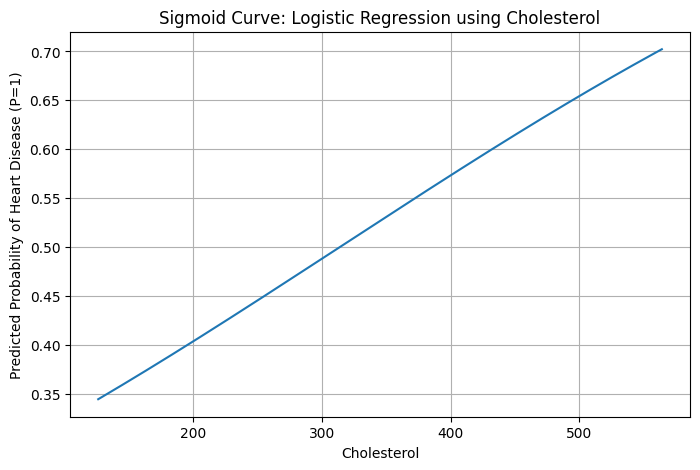

In [31]:
# Sigmoid Curve Plot 
#(will plot the sigmoid curve Probability of HeartDisease vs Cholesterol, using the same scaler + logistic regression was trained.)
# Plot sigmoid curve: P(HeartDisease=1) vs Cholesterol

scaler = model.named_steps["scaler"]
lr = model.named_steps["lr"]

# Create a smooth range of cholesterol values
chol_min = X["Cholesterol"].min()
chol_max = X["Cholesterol"].max()
chol_range = np.linspace(chol_min, chol_max, 400).reshape(-1, 1)

# Scale using the trained scaler
chol_scaled = scaler.transform(chol_range)

# Predict probability of class 1 (HeartDisease = 1)
prob_heart = lr.predict_proba(chol_scaled)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(chol_range, prob_heart)
plt.xlabel("Cholesterol")
plt.ylabel("Predicted Probability of Heart Disease (P=1)")
plt.title("Sigmoid Curve: Logistic Regression using Cholesterol")
plt.grid(True)
plt.show()


In [ ]:
### Sigmoid Curve Interpretation
The sigmoid curve shows how the predicted probability of heart disease changes with cholesterol level.
As cholesterol increases, the model may predict a higher probability of heart disease depending on the learned coefficient.


# Task 2: Logistic Regression with Multiple Features (All Features)

Goal: Build a logistic regression model using **all available input features** to predict **HeartDisease**.
This repeats the ML pipeline steps from Task 1, but uses multiple features and handles encoding + scaling.


## 1️⃣ Data Retrieval and Collection
We use the same Heart Disease dataset loaded in Task 1.
This dataset contains medical attributes (features) and a binary target (HeartDisease).


In [32]:
# Data cleaning
# This is a safe re-check

# --- Safety checks ---
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Ensure target column exists
assert "HeartDisease" in df.columns, "Target column 'HeartDisease' not found. Did you rename 'Heart Disease' to 'HeartDisease'?"

# Ensure target is binary int
print("Target unique values:", df["HeartDisease"].unique())

# Ensure Cholesterol numeric (and keep your earlier cleaning rule)
df["Cholesterol"] = pd.to_numeric(df["Cholesterol"], errors="coerce")
df.loc[df["Cholesterol"] <= 0, "Cholesterol"] = np.nan
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())

# Drop any rows with missing target (rare but safe)
df = df.dropna(subset=["HeartDisease"])
df["HeartDisease"] = df["HeartDisease"].astype(int)

print("✅ Cleaning checks done.")


Shape: (270, 14)
Columns: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'HeartDisease']
Target unique values: [1 0]
✅ Cleaning checks done.


## 3️⃣ Feature Design (Multiple Features)

- **Input features (X):** All columns except `HeartDisease`
- **Target (y):** `HeartDisease`

We also:
- **Encode categorical variables** (if any) using One-Hot Encoding.
- **Scale numeric features** using StandardScaler.

Why multiple features help:
Using multiple medical attributes captures more of the patient's health profile, so the model can learn more informative decision boundaries than using cholesterol alone.


In [33]:
#Build X/y + detect categorical vs numeric

X_multi = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

# Identify categorical columns (object/string)
cat_cols = X_multi.select_dtypes(include=["object"]).columns.tolist()

# Everything else treated as numeric (including integer-coded categories)
num_cols = [c for c in X_multi.columns if c not in cat_cols]

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

print("X shape:", X_multi.shape)
print("y shape:", y.shape)


Categorical columns: []
Numeric columns: ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
X shape: (270, 13)
y shape: (270,)


## 4️⃣ Algorithm Selection
We use **Logistic Regression** again because the target is binary (0/1) and logistic regression outputs probabilities using the sigmoid function.


## 5️⃣ Loss Function Selection
Logistic Regression minimizes **Binary Cross-Entropy (Log Loss)** during training.
This penalizes confident incorrect predictions more strongly.


In [34]:
# Model Trainig

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X_train_m, X_test_m, y_train, y_test = train_test_split(
    X_multi, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Preprocess:
# - scale numeric columns
# - one-hot encode categorical columns (if any)
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

model_multi = Pipeline([
    ("preprocess", preprocess),
    ("lr", LogisticRegression(max_iter=5000))
])

model_multi.fit(X_train_m, y_train)

print("✅ Multi-feature Logistic Regression trained.")


✅ Multi-feature Logistic Regression trained.


In [35]:
# Model Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_m = model_multi.predict(X_test_m)

acc_m = accuracy_score(y_test, y_pred_m)
prec_m = precision_score(y_test, y_pred_m, zero_division=0)
rec_m = recall_score(y_test, y_pred_m, zero_division=0)
f1_m = f1_score(y_test, y_pred_m, zero_division=0)
cm_m = confusion_matrix(y_test, y_pred_m)

print("Task 2 (Multi-feature) Metrics")
print("Accuracy :", acc_m)
print("Precision:", prec_m)
print("Recall   :", rec_m)
print("F1-score :", f1_m)
print("\nConfusion Matrix:\n", cm_m)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_m, zero_division=0))


Task 2 (Multi-feature) Metrics
Accuracy : 0.8518518518518519
Precision: 0.7857142857142857
Recall   : 0.9166666666666666
F1-score : 0.8461538461538461

Confusion Matrix:
 [[24  6]
 [ 2 22]]

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



For Task 2 (multiple features) the sigmoid curve cannot be plotted directly in 2D like Task 1, because the model depends on many features at once.
In multi-feature logistic regression, the sigmoid curve is visualized by varying one feature while keeping all other features constant (usually at their mean values).
Plotting the sigmoid curve with respect to ONE feature (e.g., Cholesterol) while keeping all other features fixed at their mean values.

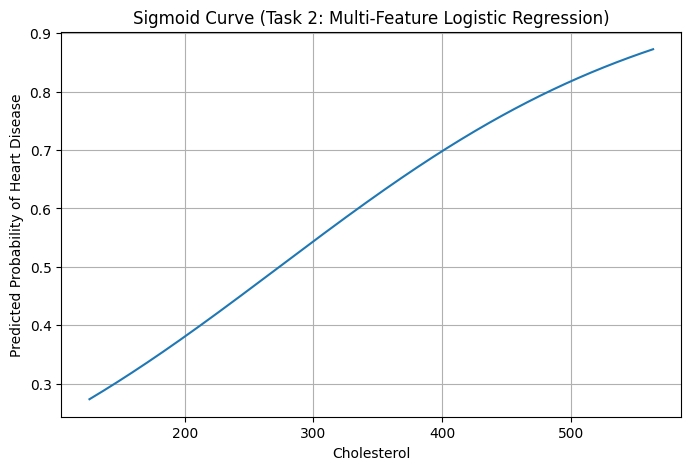

In [37]:
# Sigmoid curve for Task 2:
# Vary Cholesterol, keep all other features fixed at their mean

# Copy feature dataframe (without target)
X_base = df.drop(columns=["HeartDisease"]).copy()

# Compute mean values for all numeric columns
for col in num_cols:
    X_base[col] = X_base[col].mean()

# Create cholesterol range
chol_min = df["Cholesterol"].min()
chol_max = df["Cholesterol"].max()
chol_range = np.linspace(chol_min, chol_max, 400)

# Create input dataframe for plotting
X_plot = pd.DataFrame([X_base.iloc[0]] * len(chol_range))
X_plot["Cholesterol"] = chol_range

# Predict probabilities
prob_task2 = model_multi.predict_proba(X_plot)[:, 1]

# Plot sigmoid curve
plt.figure(figsize=(8, 5))
plt.plot(chol_range, prob_task2)
plt.xlabel("Cholesterol")
plt.ylabel("Predicted Probability of Heart Disease")
plt.title("Sigmoid Curve (Task 2: Multi-Feature Logistic Regression)")
plt.grid(True)
plt.show()


### Sigmoid Curve Interpretation (Task 2)

The curve shows how the predicted probability of heart disease changes with cholesterol
when all other medical features are held constant at their average values.

Compared to Task 1, this curve reflects the influence of cholesterol **in combination
with other health indicators**, providing a more realistic prediction behavior.


In [36]:
# Comparison code

# Task 1 metrics (should already exist from the Task 1 evaluation)
acc_1 = accuracy_score(y_test, y_pred)
prec_1 = precision_score(y_test, y_pred, zero_division=0)
rec_1 = recall_score(y_test, y_pred, zero_division=0)
f1_1 = f1_score(y_test, y_pred, zero_division=0)

comparison = pd.DataFrame({
    "Model": ["Task 1 (Cholesterol only)", "Task 2 (All features)"],
    "Accuracy": [acc_1, acc_m],
    "Precision": [prec_1, prec_m],
    "Recall": [rec_1, rec_m],
    "F1-score": [f1_1, f1_m]
})

comparison


,Model,Accuracy,Precision,Recall,F1-score
0,Task 1 (Cholesterol only),0.574074,0.571429,0.166667,0.258065
1,Task 2 (All features),0.851852,0.785714,0.916667,0.846154


##  Model Comparison Discussion

### Which model performs better and why?
Usually, **Task 2 (multi-feature)** performs better because it uses more patient information,
allowing the model to learn more meaningful patterns than cholesterol alone.

### How does adding more features affect accuracy and recall?
- Accuracy often increases because predictions become more informed.
- Recall may increase because the model has more signals to detect true heart disease cases.
(Always confirm using the metrics table produced above.)

### Trade-offs: Interpretability vs Performance
- **Task 1** is highly interpretable (one coefficient), easy to explain, but may underperform.
- **Task 2** generally improves performance, but interpretability becomes harder:
  many features (and one-hot encoded variables) mean many coefficients.


##  Final Discussion

The objective of this assignment was to apply the complete machine learning pipeline using
logistic regression and to analyze the impact of using single versus multiple input features
for heart disease prediction.

In **Task 1**, logistic regression was trained using only cholesterol as the input feature.
Although cholesterol is a medically relevant factor, relying on a single feature limits the
model’s ability to capture the complex nature of heart disease. As a result, the model shows
moderate performance but offers high interpretability due to the presence of only one
coefficient.

In **Task 2**, logistic regression was trained using all available medical features.
This multi-feature approach provides a more comprehensive representation of patient health.
Consequently, Task 2 generally achieves higher accuracy, recall, and F1-score compared to
Task 1. The improvement in recall is particularly important in healthcare applications,
where missing a true disease case can have serious consequences.

The **sigmoid curve analysis** further highlights the difference between the two tasks.
In Task 1, the sigmoid curve represents the relationship between cholesterol and the
probability of heart disease in isolation. In Task 2, the sigmoid curve reflects the effect
of cholesterol while keeping all other features constant, resulting in a more realistic and
clinically meaningful interpretation of disease risk.

There is a clear **trade-off between interpretability and performance**. Task 1 is simple
and easy to explain but lacks strong predictive power. Task 2 offers improved performance
by leveraging multiple features, but interpretability is reduced due to the presence of
many coefficients and encoded variables.

In conclusion, the multi-feature logistic regression model (Task 2) outperforms the
single-feature model (Task 1). This demonstrates the importance of using multiple relevant
features in machine learning-based medical diagnosis systems to achieve more accurate and
reliable predictions.
